In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cot12/anaconda3/envs/CoryEnv/lib/python3

In [3]:
print(tf.__version__)

1.14.0


In [1]:
fashion_mnist = keras.datasets.fashion_mnist

NameError: name 'keras' is not defined

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

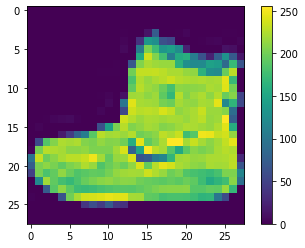

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

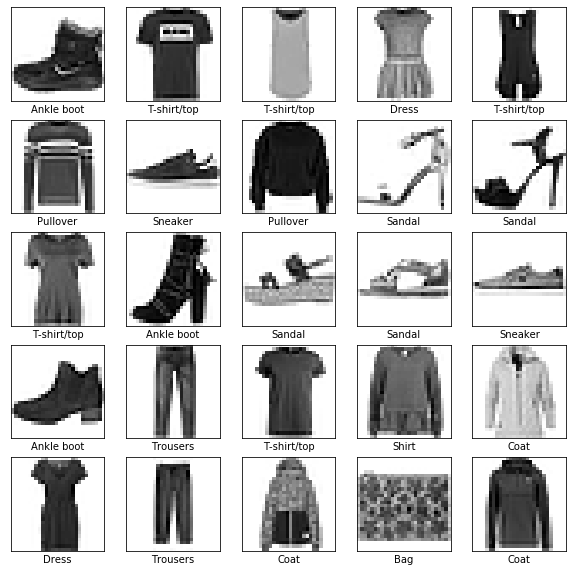

In [14]:
plt.figure(figsize = (10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.5010 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3742 - acc: 0.8657
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3353 - acc: 0.8778
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3124 - acc: 0.8858
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2936 - acc: 0.8927
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2789 - acc: 0.8976
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2681 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2566 - acc: 0.9040
Epoch 9/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2484 - acc: 0.9070
Epoch

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:' , test_acc)

10000/10000 [==============================] - 0s 19us/step
Test accuracy: 0.8762


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([4.6021019e-06, 1.9684736e-10, 3.6666144e-08, 3.2824090e-08,
       2.3438295e-07, 5.7406593e-03, 2.4345329e-07, 4.0072218e-02,
       4.8878871e-07, 9.5418143e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [107]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel = ((class_names[predicted_label], 
                                             100*np.max(predictions_array), 
                                             class_names[true_label]), color == color)
    print (class_names[predicted_label], class_names[true_label])

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i], true_label[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])

    thisplot = plt.bar(range(10),predictions_array)
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

Ankle boot Ankle boot


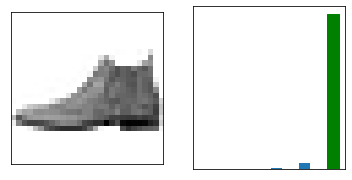

In [108]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

Sandal Sneaker


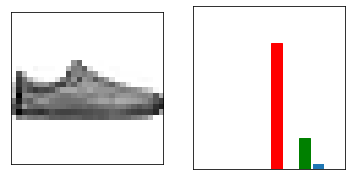

In [104]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

Ankle boot Ankle boot
Pullover Pullover
Trousers Trousers
Trousers Trousers
Shirt Shirt
Trousers Trousers
Coat Coat
Shirt Shirt
Sandal Sandal
Sneaker Sneaker
Coat Coat
Sandal Sandal
Sandal Sneaker
Dress Dress
Coat Coat


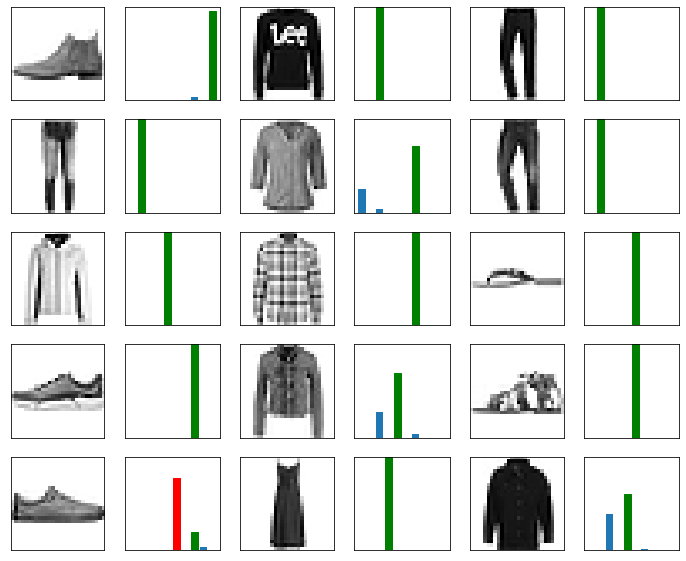

In [105]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

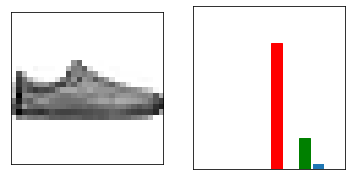

In [89]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [109]:
img = test_images[0]
print(img.shape)

(28, 28)


In [110]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Trousers Trousers


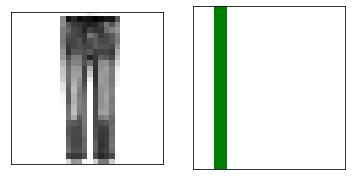

In [111]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()